In [13]:
import math as math
import numpy as np
import sympy as sm
import array as arr
import matplotlib.pyplot as plt
import pandas as pd
from lab_processing import print_errors, create_plot

In [14]:
#initial values
sm.var('x, epsilon_1, eplsilon_2, delta_1, delta_2, k, q, f, k_m, q_m, f_m')
delta_1 = 0
delta_2 = 1
epsilon_1 = 0
epsilon_2 = 0
k = x + 1
q = sm.exp(x)
f = sm.exp(-x**2)
#model task
k_m = k.subs(x, 0.5)
q_m = q.subs(x, 0.5)
f_m = f.subs(x, 0.5)

## Analytical solution of the model task

In [15]:
sm.var('lambda_1, lambda_2, C_1, C_2, u_m')

(lambda_1, lambda_2, C_1, C_2, u_m)

In [16]:
lambda_1 = sm.sqrt(q_m/k_m)

In [17]:
lambda_2 = -sm.sqrt(q_m/k_m)

In [18]:
C_1 = (((k_m*lambda_2 + delta_2)*(delta_1*f_m - epsilon_1*q_m)*sm.exp(lambda_2) 
       +
       (k_m*lambda_2 - delta_1)*(delta_2*f_m - epsilon_2*q_m)
       )
       /
       (q_m*((k_m*lambda_1 - delta_1)*(k_m*lambda_2 + delta_2)*sm.exp(lambda_2)
            -
            (k_m*lambda_2 - delta_1)*((k_m*lambda_1 + delta_2)*sm.exp(lambda_1)))
       )
      )

In [19]:
C_2 = (((k_m*lambda_1 + delta_2)*(delta_1*f_m - epsilon_1*q_m)*sm.exp(lambda_1) 
       +
       (k_m*lambda_1 - delta_1)*(delta_2*f_m - epsilon_2*q_m)
       )
       /
       (q_m*((k_m*lambda_2 - delta_1)*(k_m*lambda_1 + delta_2)*sm.exp(lambda_1)
            -
            (k_m*lambda_2 + delta_2)*((k_m*lambda_1 - delta_1)*sm.exp(lambda_2)))
       )
      )

In [20]:
u_m = C_1 * sm.exp(lambda_1*x) + C_2 * sm.exp(lambda_2*x) + f_m/q_m

In [21]:
u_m

-0.0661654572174688*exp(1.04840236254984*x) + 0.472366552741015 - 0.0661654572174688*exp(-1.04840236254984*x)

## Numerical solution of the model task

In [33]:
x_0 = 0
x_L = 1
L = 320
h = (x_L-x_0)/L
x_grid = np. arange(x_0, x_L+0.00001, h)

In [34]:
#page70
a = [k_m for _ in range(L+1)]
b = [-2*k_m - q_m*h**2 for _ in range(L+1)]
c = [k_m for _ in range(L+1)]
d = [-f_m*h**2 for _ in range(L+1)]

a[0] = k_m
a[L] = sm.S(0.0)
b[0] = -k_m - delta_1*h
b[L] = -k_m - delta_2*h
c[0] = sm.S(0.0)
c[L] = k_m
d[0] = sm.S(-epsilon_1*h)
d[L] = sm.S(-epsilon_2*h)

In [35]:
#page 71
def create_ugrid(a,b,c,d):
    alpha = [None] * (L+1)
    alpha[0] = -a[0]/b[0]
    for l in range(1, L+1):
        alpha[l] = -(a[l])/(b[l] + c[l]*alpha[l-1])
    betta = [None] * (L+1)
    betta[0] = d[0]/b[0]
    for l in range(1, L+1):
        betta[l] = (d[l] - c[l]*betta[l-1])/(b[l] + c[l]*alpha[l-1])
    
    u_grid = [None] * (L+1)
    u_grid[L] = (d[L] - c[L] * betta[L-1])/(b[L] + c[L]*alpha[L-1])
    for l in range(L, -1, -1):
        u_grid[l-1] = alpha[l-1]*u_grid[l] + betta[l-1]
        
    return u_grid

u_grid = create_ugrid(a,b,c,d)

Graphs

In [36]:
u_m_grid = [None] * (L+1)
for l in range(0, L+1):
    u_m_grid[l] = u_m.subs(x, x_grid[l])

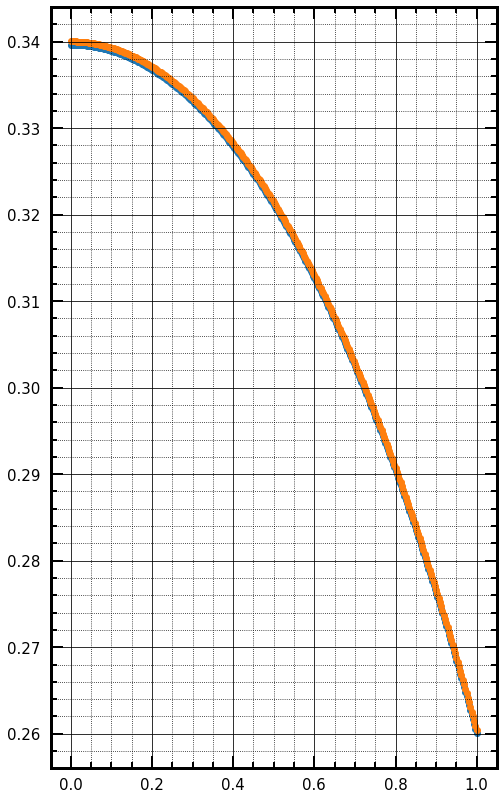

In [37]:
fig, ax = create_plot(10,10)
ax.scatter(x_grid, u_grid)
ax.scatter(x_grid, u_m_grid)
fig.set_figwidth(8)
fig.set_figheight(14)


## Variable coefficients

In [38]:
a = [k.subs(x, x_grid[l] + h/2) for l in range(L+1)]
b = [-(k.subs(x, x_grid[l] + h/2) + k.subs(x, x_grid[l] - h/2) + q.subs(x, x_grid[l])*h**2) for l in range(L+1)]
c = [k.subs(x, x_grid[l] - h/2) for l in range(L+1)]
d = [-f.subs(x, x_grid[l])*h**2 for l in range(L+1)]

a[0] = k.subs(x, x_grid[0])
a[L] = sm.S(0.0)
b[0] = -k.subs(x, x_grid[0]) - delta_1*h
b[L] = -k.subs(x, x_grid[L]) - delta_2*h
c[0] = sm.S(0.0)
c[L] = k.subs(x, x_grid[L])
d[0] = sm.S(-epsilon_1*h)
d[L] = sm.S(-epsilon_2*h)

In [39]:
u_grid_v = create_ugrid(a,b,c,d)

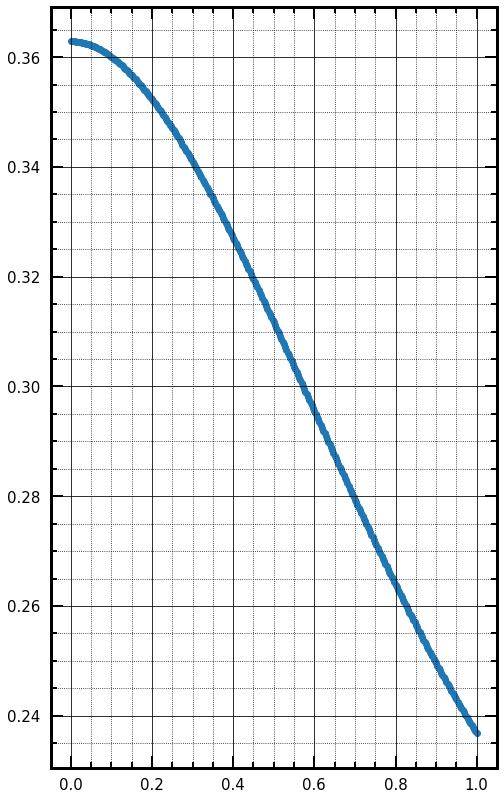

In [40]:
fig, ax = create_plot(10,10)
ax.scatter(x_grid, u_grid_v)

fig.set_figwidth(8)
fig.set_figheight(14)

In [41]:
dataset = pd.DataFrame({'x':x_grid[::(x_grid.size - 1)//10], 'Analyt' : u_m_grid[::(x_grid.size - 1)//10], 'Numerical_analyt' : u_grid[::(x_grid.size - 1)//10],'Variable':u_grid_v[::(x_grid.size - 1)//10] })
bb = dataset
bb

x             Analyt   Numerical_analyt           Variable
0   0.0  0.340035638306077  0.339652825578401  0.362877929758152
1   0.1  0.339307715949302  0.338945632339389  0.360047804830725
2   0.2  0.337115940607293  0.336770603949624  0.352316906419543
3   0.3  0.333436199361624  0.333103811754481  0.340962947032436
4   0.4  0.328228009367735  0.327904915405100  0.327090935920298
5   0.5  0.321434072481028  0.321116719052555  0.311664449452239
6   0.6  0.312979644888671  0.312664542105624  0.295523150765892
7   0.7  0.302771714812054  0.302455397629533  0.279393608947480
8   0.8  0.290697979233386  0.290376969346778  0.263897709269931
9   0.9  0.276625608388812  0.276296375985471  0.249561202862466
10  1.0  0.260399784435588  0.260058709381151  0.236823781895689

In [42]:
diff_ua_uN = abs(np.array(u_grid[::(x_grid.size - 1)//10]) - np.array(u_m_grid[::(x_grid.size - 1)//10]))

In [43]:
max(diff_ua_uN)

0.000382812727675874